In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
import torch.utils.data
from torch.autograd import Variable
from tqdm import tqdm
import matplotlib.pyplot as plt
import joblib

In [2]:
torch.cuda.is_available()

True

In [3]:
from isaac.utils import plot_confusion_matrix
from isaac.dataset import read_dataset, prepare_dataset, normalise
from isaac.training import evaluate, evaluate_saved_model
from isaac.models import ComplexRNNModel
from isaac.constants import *

In [4]:
TR_COLS = ALT_BASIC_TRAINING_COLS

In [5]:
INPUT_DIM = len(TR_COLS)    # input dimension
HIDDEN_DIM = 25  # hidden layer dimension
N_LAYERS = 4     # number of hidden layers
OUTPUT_DIM = 3   # output dimension
DROPOUT = 0.5

network_dims = (INPUT_DIM, HIDDEN_DIM, N_LAYERS, OUTPUT_DIM)

NORMALISE_DATA = True
STEP_SIZE = 1
SEQ_END = 2700

# MASS TESTING

100%|██████████| 1000/1000 [00:00<00:00, 1049.90it/s]


Model's accuracy on test set: 64.2
data/val_passive_trials.h5


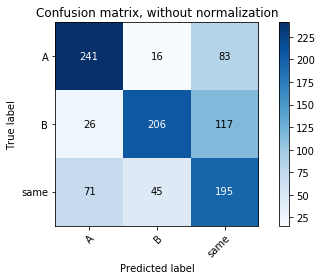

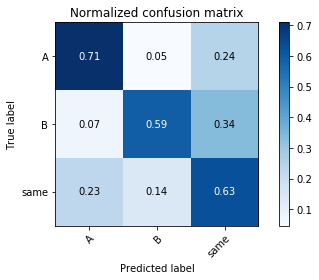

100%|██████████| 1000/1000 [00:00<00:00, 1071.68it/s]


Model's accuracy on test set: 64.2
data/test_passive_trials.h5


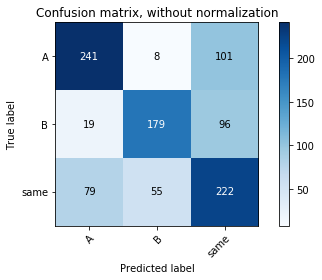

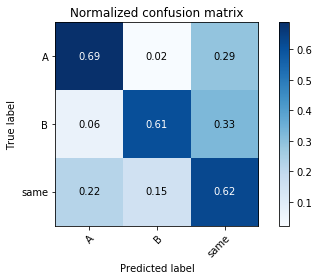

100%|██████████| 196/196 [00:00<00:00, 1066.26it/s]


Model's accuracy on test set: 64.79591836734694
data/passive_trials_exp1.h5


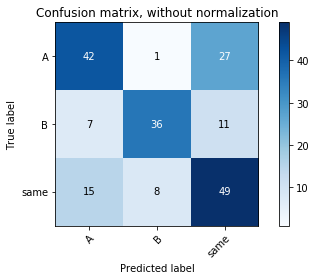

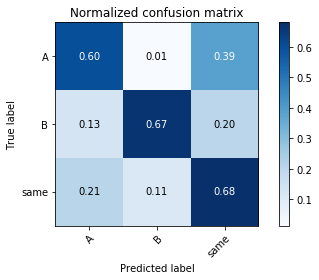

100%|██████████| 143/143 [00:00<00:00, 1066.92it/s]


Model's accuracy on test set: 55.24475524475525
data/yoked_trials_exp1.h5


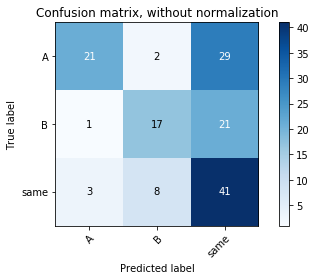

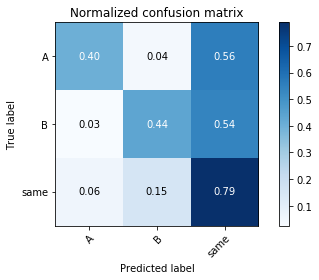

100%|██████████| 399/399 [00:00<00:00, 1047.19it/s]


Model's accuracy on test set: 47.86967418546366
data/mass_trials_exp2.h5


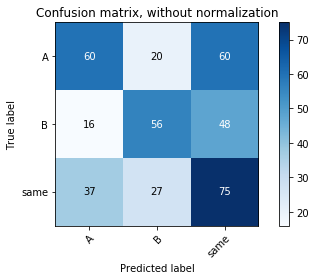

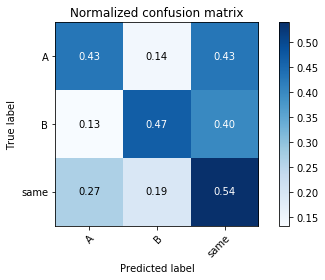

100%|██████████| 399/399 [00:00<00:00, 1105.15it/s]


Model's accuracy on test set: 44.86215538847118
data/force_trials_exp2.h5


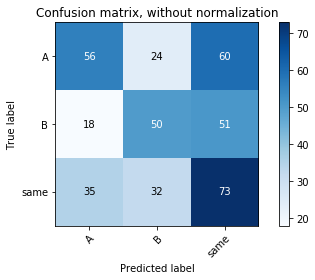

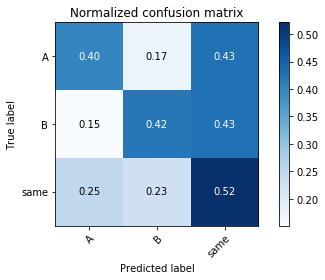

In [6]:
model_path = "models/passive_mass_model.pt"
scaler_path = "scalers/passive_mass_scaler.sk"
network_dims = (INPUT_DIM, HIDDEN_DIM, N_LAYERS, OUTPUT_DIM, DROPOUT)
class_columns = MASS_CLASS_COLS


for test_dataset_path in ["data/val_passive_trials.h5", "data/test_passive_trials.h5", 
                          "data/passive_trials_exp1.h5", 
                          "data/yoked_trials_exp1.h5", "data/mass_trials_exp2.h5", 
                          "data/force_trials_exp2.h5"]:
    evaluate_saved_model(model_path, network_dims, test_dataset_path, TR_COLS,
                         class_columns, step_size=STEP_SIZE, seq_end=SEQ_END, scaler_path=scaler_path)
    print(test_dataset_path)
    plt.show()

# FORCE TESTING

100%|██████████| 1000/1000 [00:00<00:00, 1029.67it/s]


Model's accuracy on test set: 67.1
data/val_passive_trials.h5


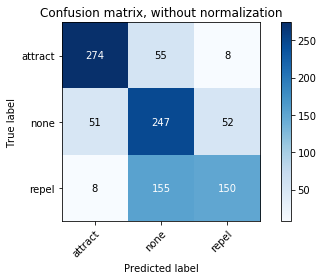

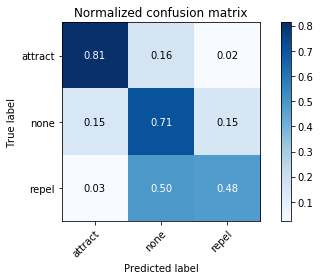

100%|██████████| 1000/1000 [00:00<00:00, 1055.95it/s]


Model's accuracy on test set: 62.4
data/test_passive_trials.h5


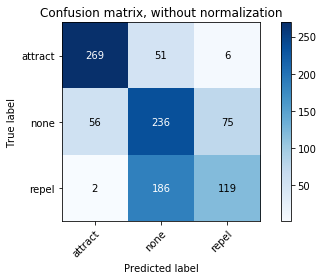

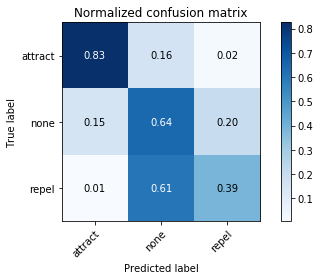

100%|██████████| 196/196 [00:00<00:00, 1022.12it/s]


Model's accuracy on test set: 65.3061224489796
data/passive_trials_exp1.h5


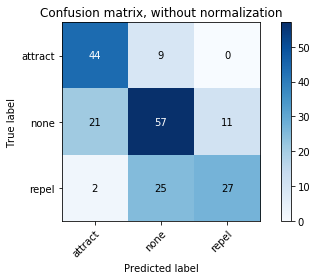

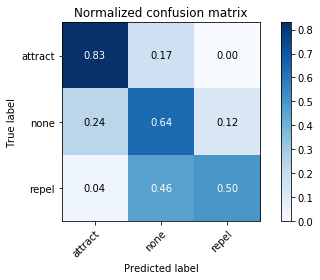

100%|██████████| 143/143 [00:00<00:00, 969.03it/s]


Model's accuracy on test set: 36.36363636363637
data/yoked_trials_exp1.h5


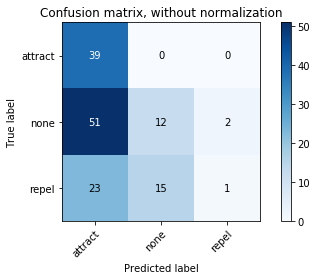

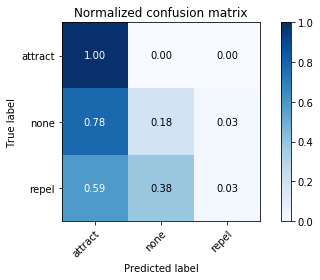

100%|██████████| 399/399 [00:00<00:00, 1041.04it/s]


Model's accuracy on test set: 40.6015037593985
data/mass_trials_exp2.h5


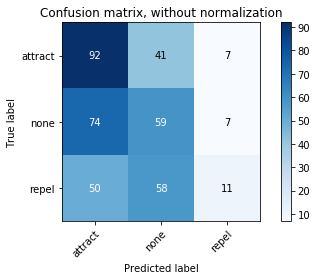

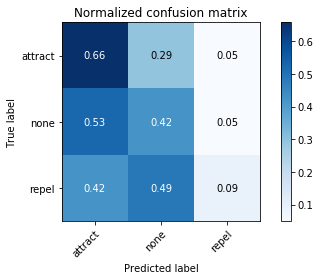

100%|██████████| 399/399 [00:00<00:00, 1062.76it/s]


Model's accuracy on test set: 41.854636591478695
data/force_trials_exp2.h5


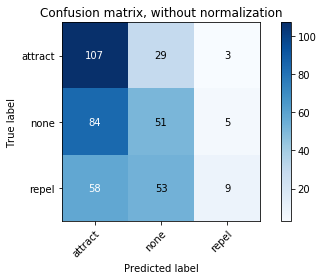

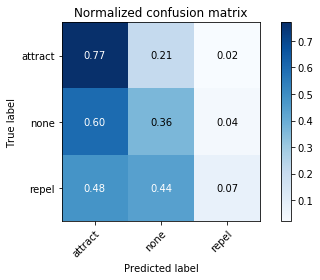

In [7]:
model_path = "models/passive_force_model.pt"
scaler_path = "scalers/passive_force_scaler.sk"
network_dims = (INPUT_DIM, HIDDEN_DIM, N_LAYERS, OUTPUT_DIM, DROPOUT)
class_columns = FORCE_CLASS_COLS

for test_dataset_path in ["data/val_passive_trials.h5", "data/test_passive_trials.h5", 
                          "data/passive_trials_exp1.h5", 
                          "data/yoked_trials_exp1.h5", "data/mass_trials_exp2.h5", 
                          "data/force_trials_exp2.h5"]:

    evaluate_saved_model(model_path, network_dims, test_dataset_path, TR_COLS,
                         class_columns, step_size=STEP_SIZE, seq_end=SEQ_END, scaler_path=scaler_path)
    print(test_dataset_path)
    plt.show()